Epoch 1/9
299/299 [==============================] - 3s 6ms/step - loss: 304.3650 - val_loss: 51.4751
Epoch 2/9
299/299 [==============================] - 1s 5ms/step - loss: 136.2104 - val_loss: 35.9253
Epoch 3/9
299/299 [==============================] - 2s 5ms/step - loss: 115.2630 - val_loss: 22.8648
Epoch 4/9
299/299 [==============================] - 2s 5ms/step - loss: 108.5550 - val_loss: 24.7523
Epoch 5/9
299/299 [==============================] - 1s 5ms/step - loss: 108.4876 - val_loss: 20.2317
Epoch 6/9
299/299 [==============================] - 1s 5ms/step - loss: 104.1882 - val_loss: 21.0345
Epoch 7/9
299/299 [==============================] - 2s 5ms/step - loss: 106.7387 - val_loss: 20.1391
Epoch 8/9
299/299 [==============================] - 2s 5ms/step - loss: 96.8367 - val_loss: 20.2954
Epoch 9/9
299/299 [==============================] - 2s 5ms/step - loss: 83.4658 - val_loss: 19.0752


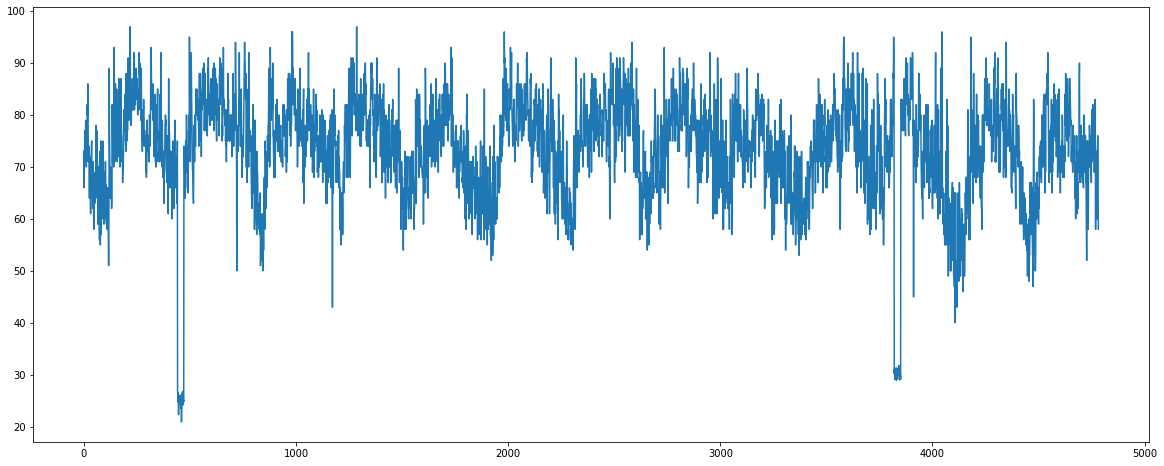

In [2]:
import pandas as pd
import numpy as np
import math
from numpy import array
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import matplotlib.pyplot as plt
from Software import cbrFox


def split_sequences(sequences, n_steps):
    inputnn, target = list(), list()
    for i in range(len(sequences)):
        end_ix = i + n_steps
        if end_ix + 1 > len(sequences):
            break
        seq_x, seq_y = sequences[i:end_ix], sequences[end_ix, (1, 4, 7)]
        inputnn.append(seq_x)
        target.append(seq_y)
    return array(inputnn), array(target)


data = pd.read_csv("C:\\Users\jerry\PycharmProjects\Weather-Forecasting-CBR-fox\sourceCode\weatherdata.csv", parse_dates=True, index_col=1)

data
np.max(data.filter(['HUM_MAX']).values)
step_days = 14
dataset = data.filter(['HUM_MIN', 'HUM_AVG', 'HUM_MAX', 'PRES_MIN', 'PRES_AVG', 'PRES_MAX', 'TEMP_MIN',
                       'TEMP_AVG', 'TEMP_MAX']).values
dataset = np.array(dataset)
# dataset = MinMaxScaler().fit_transform(dataset)
global inputnn, target, input_train, input_test, target_test, target_train
inputnn, target = split_sequences(dataset, step_days)
input_train, input_test, target_train, target_test = train_test_split(inputnn, target, test_size=0.30,
                                                                      random_state=4, shuffle=False)
plt.figure(figsize=(20, 8))
plt.plot(target_train[:, 0])
model = Sequential()
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(step_days, input_train.shape[2])))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(3))
model.compile(optimizer='adam', loss='mse')
history = model.fit(input_train, target_train, validation_data=(input_test, target_test), batch_size=16, epochs=9)

In [3]:
prediction_train = model.predict(input_train)

In [4]:
RMSE = math.sqrt(np.square(np.subtract(prediction_train, target_train)).mean())
print("Root Mean Square Error Train:\n", RMSE)
prediction = model.predict(input_test)
RMSE = math.sqrt(np.square(np.subtract(prediction, target_test)).mean())
print("Root Mean Square Error Test:\n", RMSE)

Root Mean Square Error Train:
 4.531624512370163
Root Mean Square Error Test:
 4.367520474371897


In [5]:
prediction = model.predict(inputnn[-1].reshape((1, 14, 9)))

# Uso de biblioteca de CBR-FOX

## Se importan las funciones para el ejemplo

In [1]:
from Software_2 import sktime_distance_comparison, explain_methods

C:\Users\jerry\PycharmProjects\Weather-Forecasting-CBR-fox\.venv\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Se consideran todas las variables necesarias para usar la biblioteca

In [11]:
# All windows come in the shape (x, y, z) where x is total of windows, y is window's size, and z is features per window
# Simulating all the dataset. The last one is omitted to simulate a real world case which 
windows = inputnn[0:-1]
# El caso real que se supone
targetWindow = inputnn[-1]
num_cases = 5
# Training target
target = target
smoothnessFactor = .04
inputNames = ['HUM_MIN', 'HUM_AVG', 'HUM_MAX', 'PRES_MIN', 'PRES_AVG', 'PRES_MAX', 'TEMP_MIN',
              'TEMP_AVG', 'TEMP_MAX']
outputNames = ['HUM_AVG', 'PRES_AVG', 'TEMP_AVG']
punishedSumFactor = .5

## Creación de la instancia tradicional

Se configura una instancia, la cual solo permite una técnica

In [14]:
instancia = sktime_distance_comparison(windows=windows, targetWindow=targetWindow, target=target, prediction=prediction, num_cases=num_cases,
                         smoothnessFactor=smoothnessFactor, inputNames=inputNames, outputNames=outputNames,
                         punishedSumFactor=punishedSumFactor, method="CCI")

Se usa el método explain para realizar todas los procesos necesarios que dan el resultado para el usuario

In [15]:
instancia.explain()

Calculando correlación de Pearson
Calculando correlación de Pearson


C:\Users\jerry\PycharmProjects\Weather-Forecasting-CBR-fox\.venv\lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\jerry\PycharmProjects\Weather-Forecasting-CBR-fox\.venv\lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Calculando distancia Euclidiana
Calculando MAE para cada ventana
Generando reporte de análisis


## Se puede acceder a un dataframe con los resultados de los casos

In [16]:
instancia.getAnalysisreport()

,index,CCI,MAE,index.1,CCI.1,MAE.1
0,4972,1.000000,2.895546,4809,0.410155,15.902246
1,263,0.979834,1.492065,1841,0.423713,10.485579
2,6062,0.975253,4.737190,3653,0.437751,5.852246
3,6410,0.967463,2.784875,1101,0.440702,12.202246
4,2072,0.960770,3.928880,14,0.447507,8.385579


## Se puede visualizar la relación de los mejores casos agrupados por características

Se inserta una tupla que representa las dimensiones (característica de la biblioteca de matplotib)
Se inserta una lista que representa las posiciones de las características deseadas

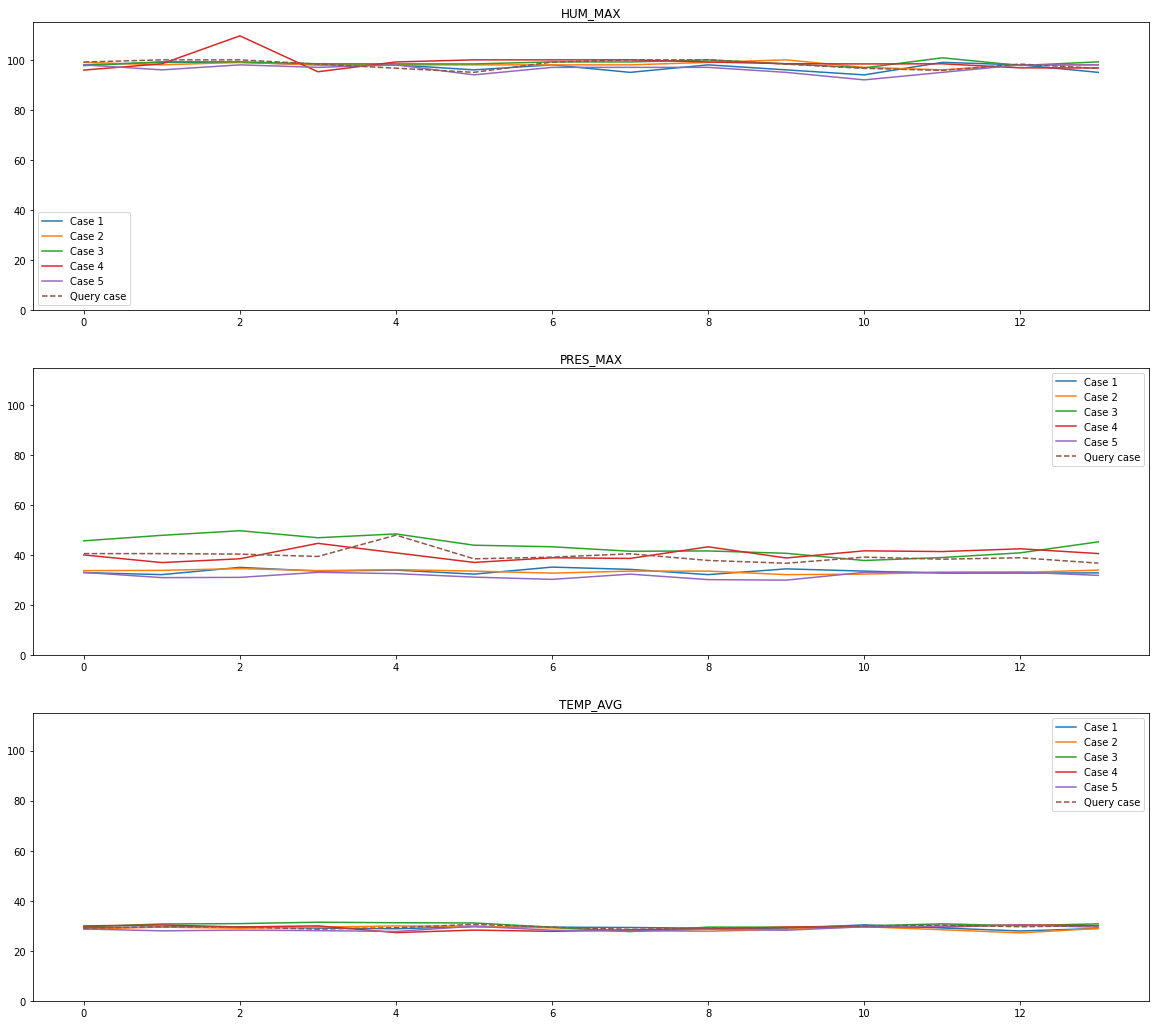

In [18]:
instancia.visualizeBestCasesPerFeature((20, 18), [2,5,7])

# Múltiples instancias

Se usa el método de explain_methods()
Recibe los mismos parámetros como si fuera una única instancia, pero también recibe una lista con los nombres de las técnicas deseadas

In [19]:
dictionary = explain_methods(windows=windows, targetWindow=targetWindow, target=target, prediction=prediction, num_cases=num_cases,
smoothnessFactor=smoothnessFactor, inputNames=inputNames, outputNames=outputNames,
punishedSumFactor=punishedSumFactor, methods=["CCI","DTW"])

Calculando correlación de Pearson
Calculando correlación de Pearson


C:\Users\jerry\PycharmProjects\Weather-Forecasting-CBR-fox\.venv\lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\jerry\PycharmProjects\Weather-Forecasting-CBR-fox\.venv\lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Calculando distancia Euclidiana
Calculando MAE para cada ventana
Generando reporte de análisis


C:\Users\jerry\PycharmProjects\Weather-Forecasting-CBR-fox\.venv\lib\site-packages\sktime\utils\numba\njit.py:6: UserWarning: No module named 'numba'. 'numba' is a soft dependency and not included in the base sktime installation. Please run: `pip install numba` to install the numba package. To install all soft dependencies, run: `pip install sktime[all_extras]`
  if _check_soft_dependencies("numba", severity="warning"):


Calculando MAE para cada ventana
Generando reporte de análisis


## Para acceder a cada instancia se hace uso del nombre de la técnica

In [20]:
dictionary["DTW"].getAnalysisreport()

,index,CCI,MAE,index.1,CCI.1,MAE.1
0,463,1.000000,22.452246,6830,0.001022,1.879387
1,3836,0.763100,19.612213,5720,0.007439,3.401235
2,4121,0.569138,8.751235,6393,0.007952,1.644816
3,847,0.504944,13.491268,6114,0.008754,5.795524
4,4459,0.477477,11.657935,5384,0.010789,2.828880


## Se puede hacer uso de las mismas funciones para un análisis detallado a cada instancia/técnica

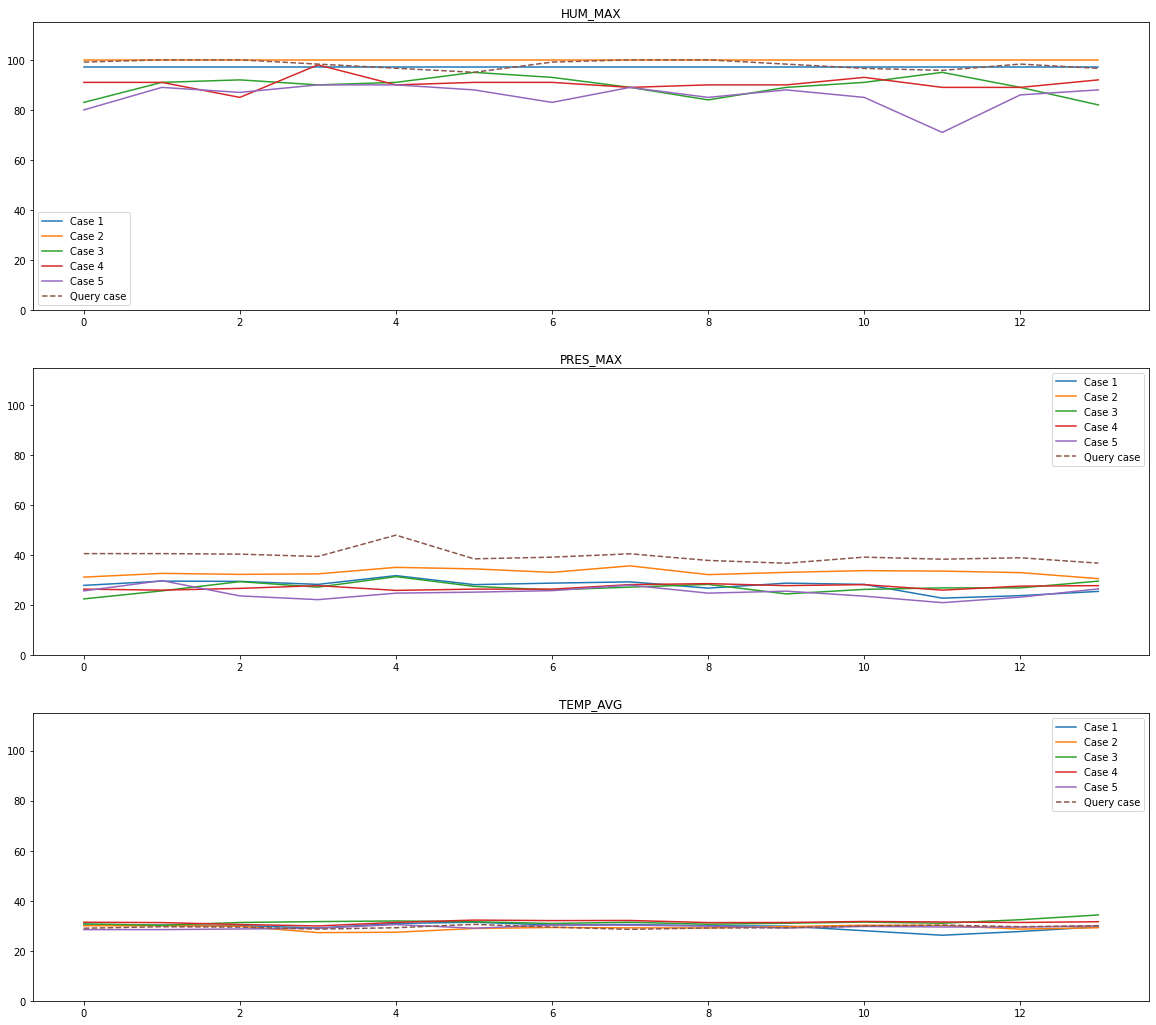

In [24]:
dictionary["DTW"].visualizeBestCasesPerFeature((20, 18), [2,5,7])